In [149]:
%pylab inline
#%%javascript
#IPython.OutputArea.auto_scroll_threshold = 9999;
from pandas import read_csv
from IPython.display import HTML

def hide():
    """I found the code for this feature here: http://blog.nextgenetics.net/?e=102"""
    return HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.output_prompt').hide();
 } else {
 $('div.input').show();
 $('div.output_prompt').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<p>The raw code for this IPython notebook is by default hidden for easier reading.</p>
<p>To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</p>
''')
hide()

Populating the interactive namespace from numpy and matplotlib


In [3]:
medicare = read_csv("Medicare_a_CY2013b.csv", header = True)

In [5]:
len(medicare)

29997

In [7]:
avg_allowed = array([0 for i in range(len(medicare))])
for i in range(len(medicare)):
    s = medicare["average_Medicare_allowed_amt"][i][1:]
    if(len(s)>6):
        avg_allowed[i] = float(s[:len(s)-7]+s[len(s)-6:])
    else:
        avg_allowed[i] = float(s)        

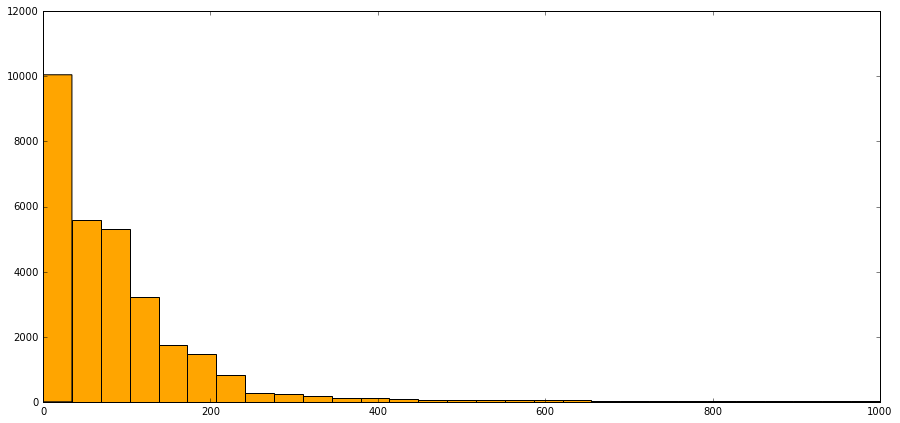

In [92]:
figsize(15,7)
hist(avg_allowed, bins = linspace(0,1000,30), color = "orange");

In [93]:
avg_submit = array([0 for i in range(len(medicare))])
for i in range(len(medicare)):
    s = medicare["average_submitted_chrg_amt"][i][1:]
    if(len(s)>6):
        avg_submit[i] = float(s[:len(s)-7]+s[len(s)-6:])
    else:
        avg_submit[i] = float(s)
avg_payment = array([0 for i in range(len(medicare))])
for i in range(len(medicare)):
    s = medicare["average_Medicare_payment_amt"][i][1:]
    if(len(s)>6):
        avg_payment[i] = float(s[:len(s)-7]+s[len(s)-6:])
    else:
        avg_payment[i] = float(s)

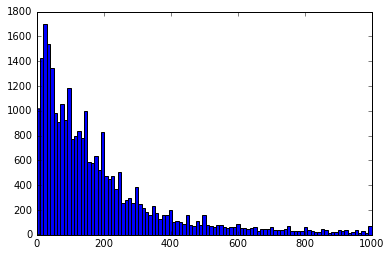

In [10]:
hist(avg_submit, bins = linspace(0,1000,100));

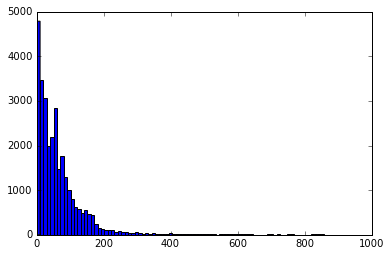

In [11]:
hist(avg_payment, bins = linspace(0,1000,100));

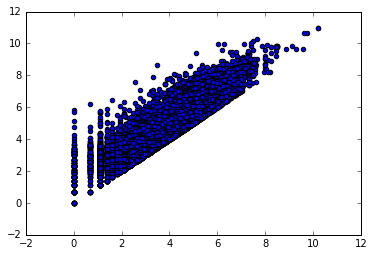

In [12]:
scatter(log(avg_allowed),log(avg_submit));

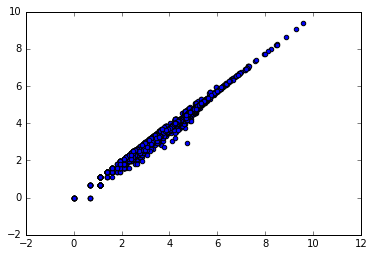

In [13]:
scatter(log(avg_allowed),log(avg_payment))

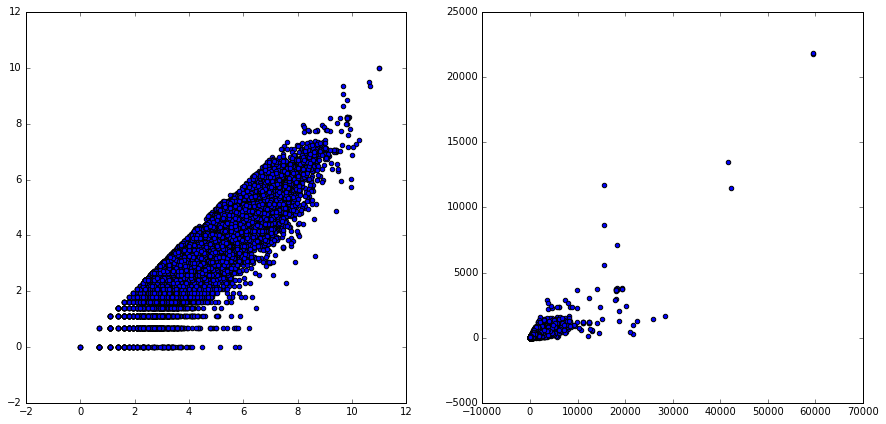

In [97]:
subplot(121)
scatter(log(avg_submit),log(avg_payment))
subplot(122)
scatter(avg_submit,avg_payment)
None

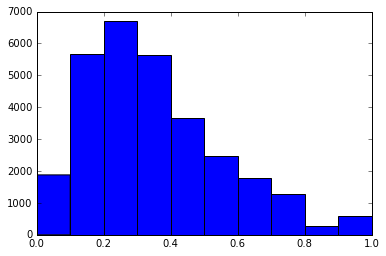

In [13]:
x = avg_payment/avg_submit

import pandas as pd
x  = pd.Series(x).dropna()
hist(x);

In [14]:
p_type = medicare.groupby(["provider_type"])
allowed = p_type["average_Medicare_allowed_amt"].apply(lambda x : x.tolist())

In [15]:
def make_float(ls):
    out = []
    for s in ls:
        s = s[1:]
        if(len(s)>6):
            out.append(float(s[:len(s)-7]+s[len(s)-6:]))
        else:
            out.append(float(s))
    return out

allowed = allowed.apply(make_float)

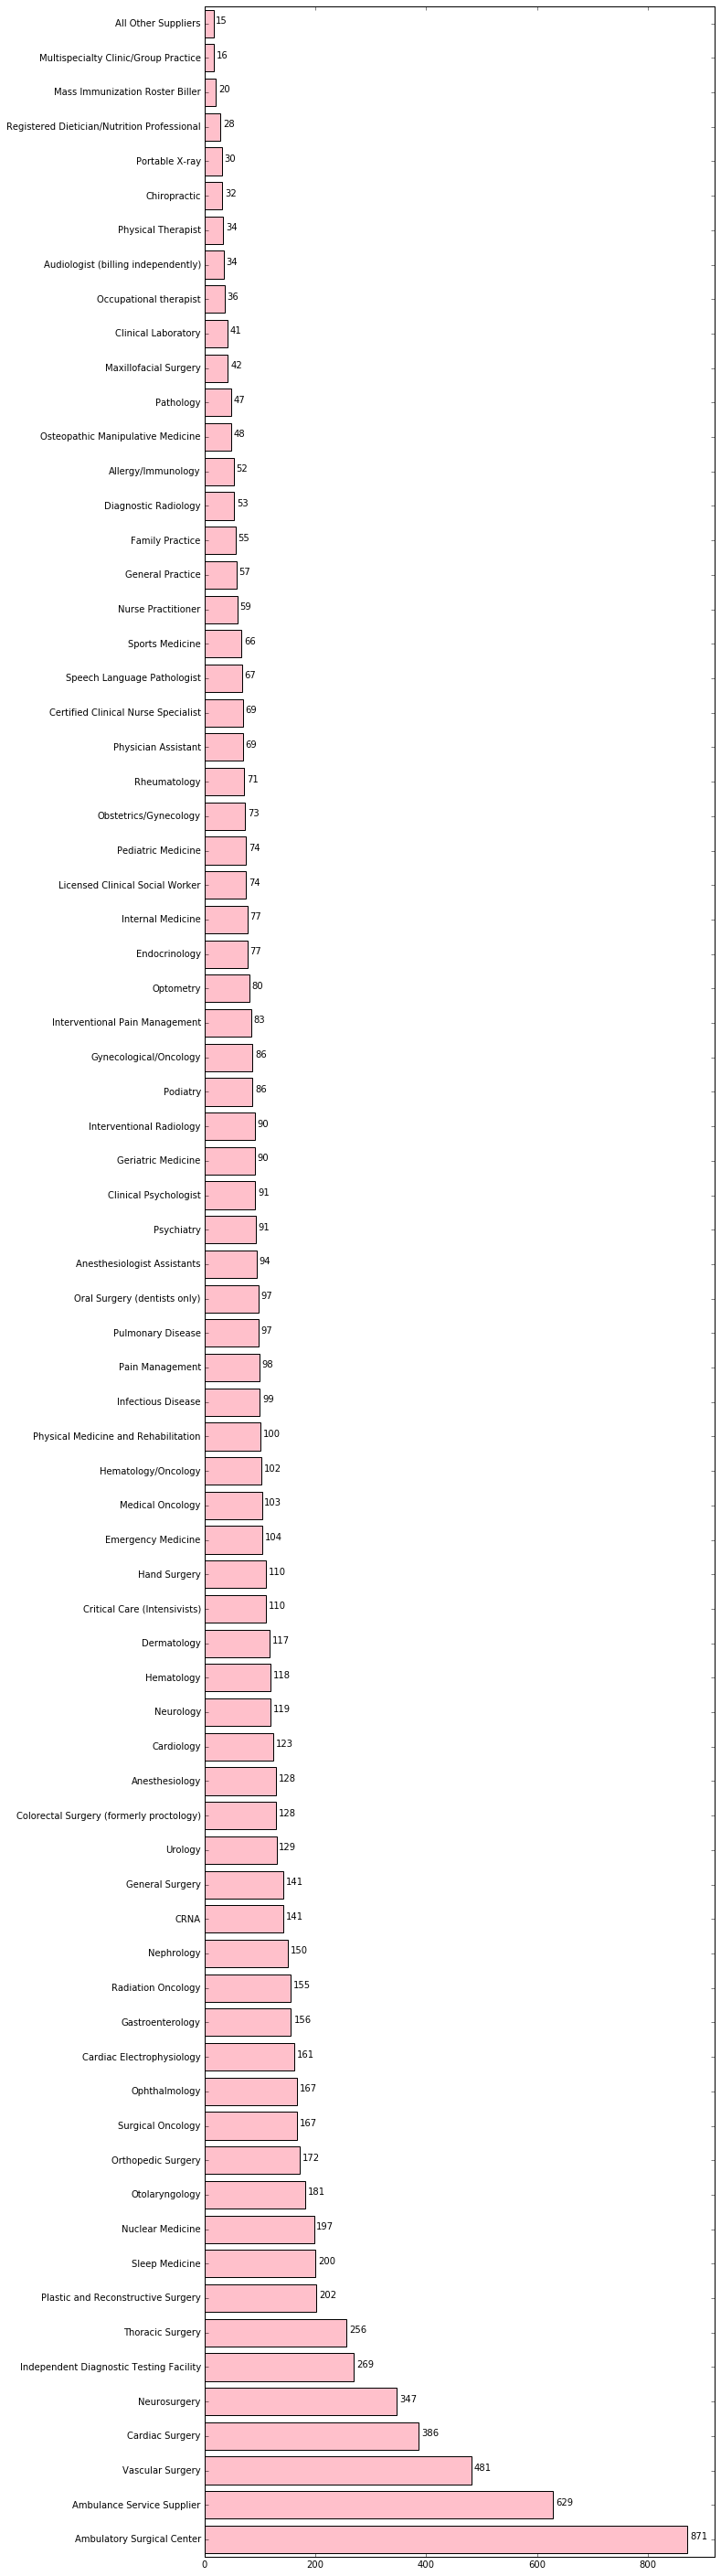

In [147]:
mean_allowed = allowed.apply(mean)
mean_allowed.sort(ascending = False)
figsize(10,50)
barh(range(len(allowed)), mean_allowed, align = "center", color="pink")
yticks(range(len(allowed)), mean_allowed.index)
ylim(-0.5,len(allowed) - 0.5);
xlim(0,920)
for i in range(len(allowed)):
    text(int(mean_allowed.ix[i])+5,i,int(mean_allowed.ix[i]))
None

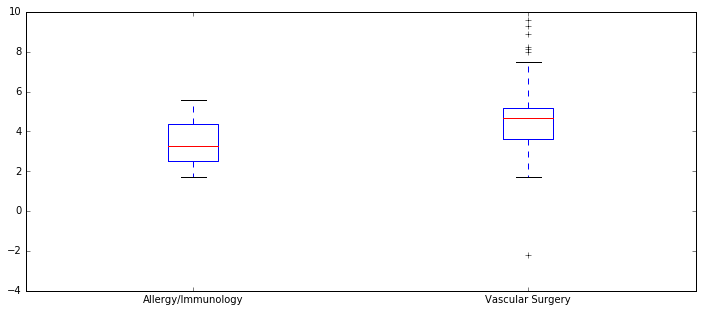

In [130]:
figsize(12,5)
boxplot([log(allowed.ix[1]), log(allowed.ix[-1])], labels= [allowed.index[1], allowed.index[-1]]);

In [20]:
allowed.index[0]

'Allergy/Immunology'

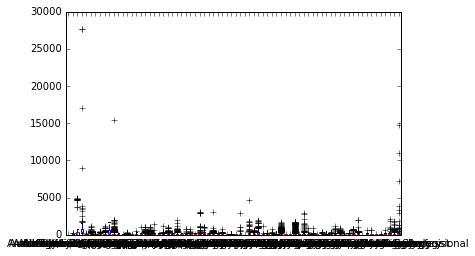

In [17]:
boxplot([x for x in allowed], labels= [x for x in allowed.index]);

In [20]:

p_type = medicare.groupby(["nppes_provider_state"])
number_of_claims = p_type["average_Medicare_allowed_amt"].apply(lambda x : x.tolist()).apply(lambda x : len(x))

In [23]:
states = """CA	1	38,332,521
TX	2	26,448,193
NY	3	19,651,127
FL	4	19,552,860
IL	5	12,882,135
PA	6	12,773,801
OH	7	11,570,808
GA	8	9,992,167
MI	9	9,895,622
NC	10	9,848,060
NJ	11	8,899,339
VA	12	8,260,405
WA	13	6,971,406
MA	14	6,692,824
AZ	15	6,626,624
IN	16	6,570,902
TN	17	6,495,978
MO	18	6,044,171
MD	19	5,928,814
WI	20	5,742,713
MN	21	5,420,380
CO	22	5,268,367
AL	23	4,833,722
SC	24	4,774,839
LA	25	4,625,470
KY	26	4,395,295
OR	27	3,930,065
OK	28	3,850,568
CT	29	3,596,080
IA	30	3,090,416
MS	31	2,991,207
AR	32	2,959,373
UT	33	2,900,872
KS	34	2,893,957
NV	35	2,790,136
NM	36	2,085,287
NE	37	1,868,516
WV	38	1,854,304
ID	39	1,612,136
HI	40	1,404,054
ME	41	1,328,302
NH	42	1,323,459
RI	43	1,051,511
MT	44	1,015,165
DE	45	925,749
SD	46	844,877
AK	47	735,132
ND	48	723,393
DC	49	646,449
VT	50	626,630
WY	51	582,658"""
states = states.split("\n")
states = [x.split("\t") for x in states]
cleaned_states = {}
import re
for x in states:
    cleaned_states[x[0]] = int(re.sub(",","",x[2]))


cleaned_states["PR"] = 3458000

In [27]:
state_abr = """Alabama	Ala.	AL
Alaska	Alaska	AK
American Samoa	 	AS
Arizona	Ariz.	AZ
Arkansas	Ark.	AR
California	Calif.	CA
Colorado	Colo.	CO
Connecticut	Conn.	CT
Delaware	Del.	DE
District of Columbia	D.C.	DC
Florida	Fla.	FL
Georgia	Ga.	GA
Guam	Guam	GU
Hawaii	Hawaii	HI
Idaho	Idaho	ID
Illinois	Ill.	IL
Indiana	Ind.	IN
Iowa	Iowa	IA
Kansas	Kans.	KS
Kentucky	Ky.	KY
Louisiana	La.	LA
Maine	Maine	ME
Maryland	Md.	MD
Marshall Islands	 	MH
Massachusetts	Mass.	MA
Michigan	Mich.	MI
Micronesia	 	FM
Minnesota	Minn.	MN
Mississippi	Miss.	MS
Missouri	Mo.	MO
Montana	Mont.	MT
Nebraska	Nebr.	NE
Nevada	Nev.	NV
New Hampshire	N.H.	NH
New Jersey	N.J.	NJ
New Mexico	N.M.	NM
New York	N.Y.	NY
North Carolina	N.C.	NC
North Dakota	N.D.	ND
Northern Marianas	 	MP
Ohio	Ohio	OH
Oklahoma	Okla.	OK
Oregon	Ore.	OR
Palau	 	PW
Pennsylvania	Pa.	PA
Puerto Rico	P.R.	PR
Rhode Island	R.I.	RI
South Carolina	S.C.	SC
South Dakota	S.D.	SD
Tennessee	Tenn.	TN
Texas	Tex.	TX
Utah	Utah	UT
Vermont	Vt.	VT
Virginia	Va.	VA
Virgin Islands	V.I.	VI
Washington	Wash.	WA
West Virginia	W.Va.	WV
Wisconsin	Wis.	WI
Wyoming	Wyo.	WY"""
state_to_abr = {}
abr_to_state = {}
state_abr = state_abr.split("\n")
for line in state_abr:
    x = line.split("\t")
    state = x[0]
    abr = x[2]
    state_to_abr[state] = abr
    abr_to_state[abr] = state
len(abr_to_state)

59

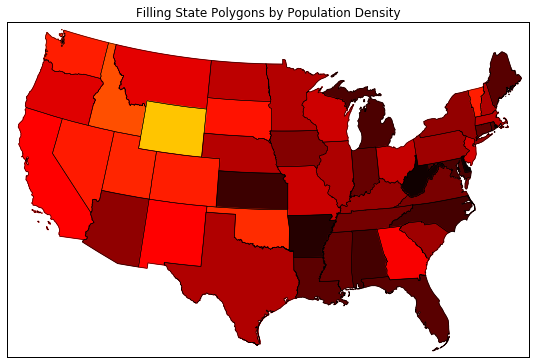

In [125]:
all_together_now = {}
for x in number_of_claims.index:
    if((x == "GU") or (x=="MP") or (x == "VI") or (x == "ZZ")): #ZZ is state unknown
        continue
    all_together_now[abr_to_state[x]] ={"pop":cleaned_states[x], \
                          "claims/capita":50000*number_of_claims[x]/cleaned_states[x],\
                         "abr":x, "claims":number_of_claims[x] }

figure(figsize=(12,6))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
shp_info = m.readshapefile('st99_d90','states',drawbounds=True)
colors={}
statenames=[]
cmap = cm.hot 
vmin = 0; vmax = 8 # set range.
##print len(m.states_info),m.states_info[0].keys()
for shapedict in m.states_info:
  statename = shapedict['NAME']
  if statename != 'District of Columbia': # skip DC, it's not a state!
    pop = all_together_now[statename]["claims/capita"]
    
    colors[statename] = cmap(1.-math.sqrt((pop-vmin)/(vmax-vmin)))[:3]
  statenames.append(statename)
# cycle through state names, color each one.
for nshape,seg in enumerate(m.states):

  xx,yy = zip(*seg)
  if statenames[nshape] != 'District of Columbia': # skip DC
     color = rgb2hex(colors[statenames[nshape]]) 
     fill(xx,yy,color,edgecolor=color)
# draw meridians and parallels.
#m.drawparallels(arange(25,65,20),labels=[1,0,0,0])
#m.drawmeridians(arange(-120,-40,20),labels=[0,0,0,1])
title('Filling State Polygons by Population Density')
None
    
